# Monte Carlo simulation

Monte Carlo simulation can be used to estimate the outcome of non-deterministic processes where that follow some probability distribution.

There are two components that we need to run a Monte Carlo simulation:

- The equation to evaluate
- The random variables for the input

In this example we are considering leasing a machine for a manufacturing process. The one-year lease costs is $300,000. There are some estimations on the 90% confidence interval of the impact.

- savings between 5 and -2 dollars to produce each unit.
- savings between 20 and 15 dollars to transport each unit.
- production increase between 30000 and 20000.

We want to know if it's worth investing in buying the machine.




In [6]:
%matplotlib inline
import scipy
from scipy.stats import norm
import pandas as pd
from matplotlib import pyplot as plt

machinery_cost = 300000

number_of_simulations = 1000000
confidence = 0.90
n =1000

conf_interval = (scipy.stats.t.ppf((1 + confidence) / 2., n-1))*2


# Defining the variables

# We find the distributions of the potential savings that we will have
transport_saving = norm(loc = (20 + 15) / 2, scale = (20 - 15) / conf_interval)
# Savings in labour are estimated between 5 and -1
labor_saving = norm(loc = (5 - (-2)) / 2, scale = (5 - (-2)) / conf_interval)
transport_results = transport_saving.rvs(number_of_simulations)
labor_results = labor_saving.rvs(number_of_simulations)
prod_level = norm(loc = (30000 + 20000) / 2, scale = (30000 - 10000) / conf_interval)

prod_level_results = prod_level.rvs(number_of_simulations)
data = pd.DataFrame({
    "transport_saving_per_unit": transport_results,
    "labor_savings_per_unit": labor_results,
    "production_level": prod_level_results
})
data["total_savings"] = 0

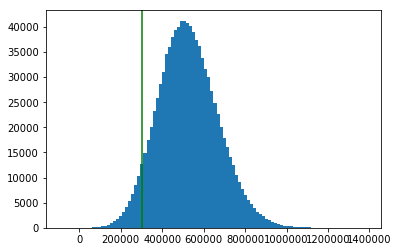

'The probability of losing money is: 5.0261%'

In [2]:
plt.hist(data.total_savings, bins = 100)
plt.axvline(x = machinery_cost, c = "g")
plt.show()

probability_losing_money = data[data["total_savings"] < machinery_cost].count()["total_savings"] / 1000000
f"The probability of losing money is: {probability_losing_money*100}%"